# K-Nearest Neighbors Classifier

This is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbours are classified

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing

In [2]:
data = pd.read_csv("../xdata/credit_data.csv")
data.head(10)

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1
5,6,24904.064140,57.471607,15.498598,0.000622,0
6,7,48430.359613,26.809132,5722.581981,0.118161,0
7,8,24500.141984,32.897548,2971.003310,0.121265,1
8,9,40654.892537,55.496853,4755.825280,0.116980,0
9,10,25075.872771,39.776378,1409.230371,0.056199,0


In [3]:
# Get sum of defaults
data.default.sum()

283

Missing values

In [4]:
print(data.isna().sum(axis = 0))

clientid    0
income      0
age         0
loan        0
LTI         0
default     0
dtype: int64


Extract features including income, age and loan

In [5]:
features = data[["income","age","loan"]]
target = data.default
target.head()

0    0
1    0
2    0
3    0
4    1
Name: default, dtype: int64

In [6]:
features.head()

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235


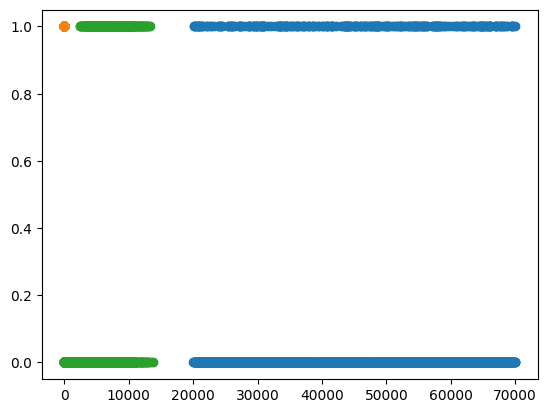

In [7]:
plt.scatter(data.income, data.default)
plt.scatter(data.age, data.default)
plt.scatter(data.loan, data.default)
plt.show()

Preproces features with standard scaling

In [8]:
features = preprocessing.MinMaxScaler().fit_transform(features)

Split dataset into train and test sets

In [10]:
feature_train, feature_test, target_train, target_test = train_test_split(features,target)

## Model Training

In [11]:
model = KNeighborsClassifier(n_neighbors=32)
fitModel = model.fit(feature_train, target_train)
predictions = fitModel.predict(feature_test)

## Finding Optimal K Value

We are going to use cross-validation in order to find the optimal k value. This optimal value is not going to have as good accuracy and precision as we have seen for any neighbors close to n but it is going to be much more realistic because we use cross-validation. So we are going to use the cross-validation scores and then we are going to make a simple iteration. Basically we are going to consider k values from 1 up to 100.

In [12]:

cross_valid_scores = []

for k in range(1, 100):
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn,features, target, cv = 10, scoring = 'accuracy')
  cross_valid_scores.append(scores.mean())    

print("Optimal k with cross-validation: \t",np.argmax(cross_valid_scores))

Optimal k with cross-validation: 	 32


## Evaluation

Print error matrix and accuracy score

In [13]:
print(confusion_matrix(target_test,predictions))
print(accuracy_score(target_test,predictions))

[[437   1]
 [  4  58]]
0.99


<AxesSubplot:>

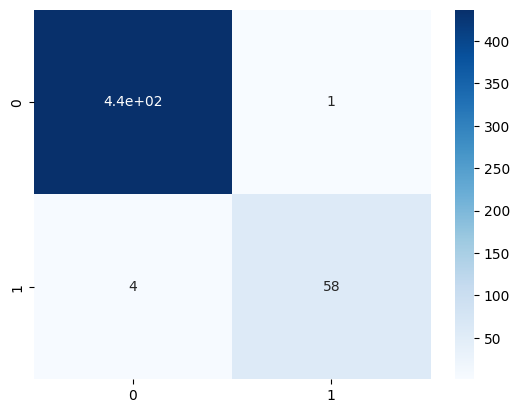

In [14]:
import seaborn as sns
sns.heatmap(confusion_matrix(target_test,predictions), annot=True, cmap='Blues')
